In [1]:
from hossam import load_data
from pandas import melt, DataFrame,pivot_table
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
import seaborn as sb
import numpy as np
from math import sqrt

from scipy.stats import t, normaltest, bartlett, levene, ttest_rel,mannwhitneyu,wilcoxon
from statannotations.Annotator import Annotator 
from IPython.display import display

In [2]:
my_dpi = 200                                    # 이미지 선명도(100~300)
font_path = "./NotoSansKR-Regular.ttf"          # 한글을 지원하는 폰트 파일의 경로
fm.fontManager.addfont(font_path)               # 폰트의 글꼴을 시스템에 등록함
font_prop = fm.FontProperties(fname=font_path)  # 폰트의 속성을 읽어옴
font_name = font_prop.get_name()                # 읽어온 속성에서 폰트의 이름만 추출     
plt.rcParams['font.family'] = font_name         # 그래프에 한글 폰트 적용
plt.rcParams['font.size'] = 10                  # 기본 폰트크기
plt.rcParams['axes.unicode_minus'] = False      # 그래프에 마이너스 깨짐 방지(한글환경에서 필수)


In [3]:
origin = load_data('blood_pressure')

print("\n===== 데이터 크기확인 =====")
print(f"데이터셋 크기: {origin.shape}")
print(f"열 개수: {origin.shape[1]}") 
print(f"행 개수: {origin.shape[0]}")

print("\n===== 타입확인 =====")
print(origin.info())

origin.head()

[data] https://data.hossam.kr/data/lab10_/blood_pressure.xlsx
[desc] 부인 15명을 대상으로 평상시 혈압을 측정한 뒤, 이들에게 이 피임약을 일정 기간 복용하게 한 후 이들의 혈압을 다시 측정한 결과를 기록한 데이터 (출처: 방송통신대학교 통계학개론)
[!] Cannot read metadata

===== 데이터 크기확인 =====
데이터셋 크기: (15, 2)
열 개수: 2
행 개수: 15

===== 타입확인 =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   복용전     15 non-null     int64
 1   복용후     15 non-null     int64
dtypes: int64(2)
memory usage: 372.0 bytes
None


,복용전,복용후
0,70,68
1,80,72
2,72,62
3,76,70
4,76,58


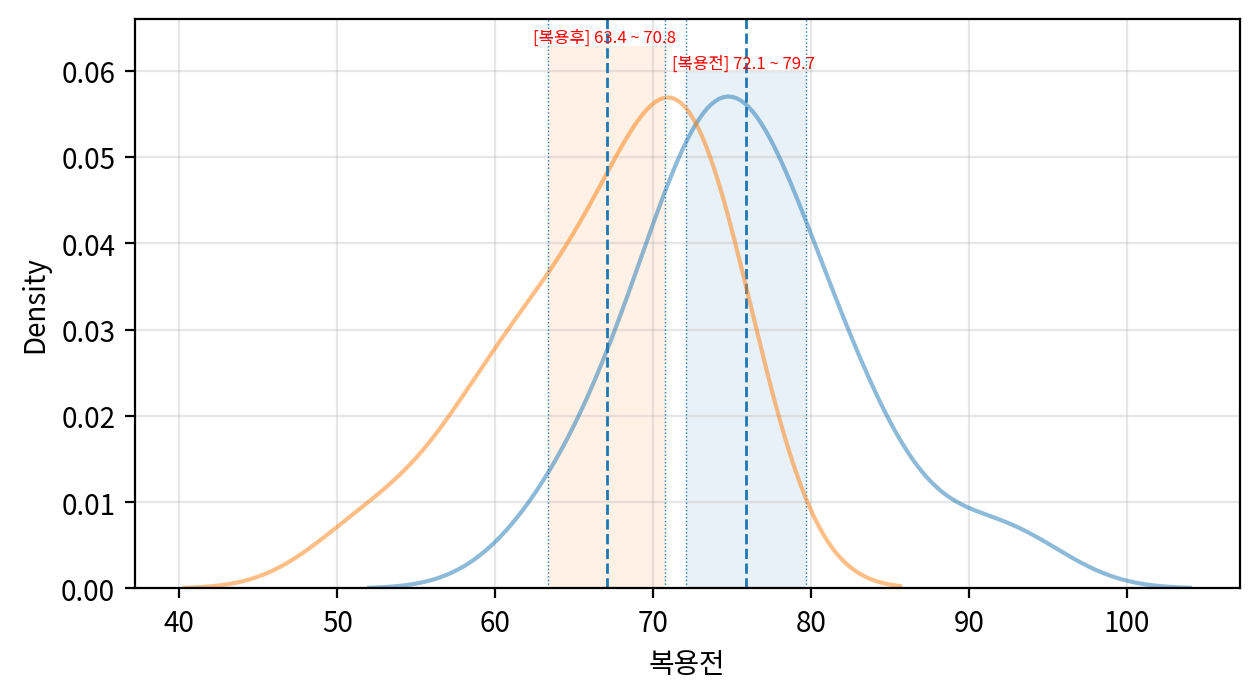

,statistic,p-value,result
field,,,
복용전,2.590682,0.273805,True
복용후,2.656338,0.264962,True


In [5]:
data = origin[['복용전', '복용후']]

#---------------------------------------------
# 데이터 분포 / 신뢰구간 시각화
#---------------------------------------------
width_px = 1280
height_px = 720
rows = 1
cols = 1
figsize = (width_px/ my_dpi, height_px/ my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi= my_dpi)


for c in data.columns:
    sb.kdeplot(data=data, x=c, fill=False, alpha=0.5)

    max = data[c].max()
    clevel = 0.95
    dof = len(data[c]) - 1
    sp_mean = data[c].mean()
    sp_std = data[c].std(ddof=1)
    sp_std_error = sp_std / sqrt(len(data[c]))
    cmin, cmax = t.interval(clevel, dof, loc=sp_mean, scale=sp_std_error)

    ax.axvline(cmin, linestyle=':', linewidth=0.5)
    ax.axvline(cmax, linestyle=':', linewidth=0.5)

    ymin, ymax = ax.get_ylim()
    ax.fill_between([cmin,cmax], 0, ymax, alpha=0.1)
    ax.axvline(sp_mean, linestyle='--', linewidth=1)

    ax.text(x=(cmax-cmin)/2+cmin, y=ymax,
            s="[%s] %0.1f ~ %0.1f " % (c, cmin, cmax), horizontalalignment="center",
            verticalalignment="bottom",fontdict={"size":6, "color":"red"})

ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
plt.close()

#-----------------------------------------------------------
# 가설검정의 가정 확인
#-----------------------------------------------------------
equal_var_fields = []
normal_dist = True
report = []

for c in data.columns:
    s,p = normaltest(data[c])

    normalize = p>0.05
    report.append({
         "field": c,
        "statistic": s,
        "p-value": p,
        "result": normalize
    })
    normal_dist = normal_dist and normalize
report_df =DataFrame(report).set_index('field')
report_df

In [ ]:
fields=['복용전', '복용후']
use_log = False
equal_var=True

df = origin[fields]
alternative = ["two-sided", "less", "greater"]
result = []
fmt =  "μ({f0}) {0} μ({f1})"



for a in alternative:
    if use_log:
        input1 = np.log(df[fields[0]])
        input2 = np.log(df[fields[1]])

    else:
        input1 = df[fields[0]]
        input2 = df[fields[1]]


    if equal_var:
        s, p =ttest_rel(input1, input2, alternative=a)
    
    else:
        s,p = mannwhitneyu(input1, input2, alternative=a)

    itp= None

    if a =="two-sided":
        itp = fmt.format("==" if p>0.05 else "!=", f0=fields[0], f1 =fields[1])

    elif a =="less":
        itp = fmt.format(">=" if p>0.05 else "<", f0=fields[0], f1=fields[1])

    else:
        itp = fmt.format("<=" if p>0.05 else ">", f0=fields[0], f1=fields[1])

        result.append({ 
            "alternative" : a
        "statistic":s,
        "p-value" : p,
        "H0":p>0.05
        "H1":P<=0.05,
        "interpretation":itp
         })    
        if a == "two-sided" and p>0.05:
            break
        
rdf = DataFrame(result)
rdf.set_index('alternative', inplace = True)
rdf






KeyError: 'f0'